<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149630691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 50.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.1 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=7cacbbe5815dc3a053d103b9e254080a7d2aacb51195d0ee1487e15e4bac0acb
  Stored in directory: /root/

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.151871,1.817859,0.119195,1.896027,14.108027,12.500545,14.591781,17.548562,2.297085,0.636640,...,0.139064,4.182635,3.877429,3.963708,3.760636,0.429861,6.328740,0.455465,0.936757,0.000663
2014-11-25,12.037019,1.817996,0.119593,1.900439,14.110111,12.529135,14.629441,17.600608,2.299558,0.638595,...,0.138742,4.217387,3.878215,3.976920,3.761292,0.430186,6.359343,0.456166,0.940235,0.000660
2014-11-26,12.037755,1.816907,0.119822,1.906309,14.097779,12.527333,14.663641,17.630951,2.296583,0.639638,...,0.138621,4.220513,3.875465,3.997442,3.757103,0.430598,6.380240,0.456313,0.941547,0.000659
2014-11-27,12.051083,1.822963,0.119910,1.902079,14.136198,12.466643,14.656783,17.617820,2.302200,0.638382,...,0.138999,4.216740,3.886133,3.985171,3.767342,0.431376,6.408068,0.457556,0.944113,0.000661
2014-11-28,12.061245,1.827336,0.119376,1.906498,14.186193,12.417714,14.693750,17.659951,2.309007,0.639928,...,0.139697,4.237847,3.899877,3.993861,3.780162,0.432111,6.390753,0.457915,0.947705,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02,13.980184,2.776804,0.144425,1.955270,21.715344,15.804646,24.015390,23.076613,2.969607,0.944229,...,0.076738,5.189472,5.966574,4.644596,5.791685,0.604547,0.766693,0.670082,0.593802,0.000891
2023-11-03,14.042886,2.765182,0.144397,1.975454,21.639848,15.766260,24.024719,23.130283,2.962512,0.943467,...,0.076186,5.220333,5.945830,4.629439,5.768472,0.604634,0.761851,0.667752,0.591738,0.000888
2023-11-04,14.043306,2.765265,0.144402,1.976997,21.639620,15.767324,24.023183,23.130684,2.962522,0.943470,...,0.076185,5.220278,5.945767,4.629390,5.768412,0.604628,0.761843,0.667745,0.591731,0.000888


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== ARS ========================================
2023-11-07 02:35:57,046 - Unknown integration target: 
2023-11-07 02:36:03,963 - Unknown integration target: 
2023-11-07 02:36:11,242 - Unknown integration target: 
2023-11-07 02:36:18,010 - Unknown integration target: 
2023-11-07 02:36:24,924 - Unknown integration target: 
2023-11-07 02:36:40,159 - Unknown integration target: 
2023-11-07 02:36:55,336 - Unknown integration target: 
2023-11-07 02:37:10,700 - Unknown integration target: 
2023-11-07 02:37:12,870 - Unknown integration target: 
2023-11-07 02:37:12,874 - Unknown integration target: 
2023-11-07 02:37:18,650 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 263.5 MiB
2023-11-07 02:37:18,654 - ApiComposer - Initial pipeline was fitted in 3.6 sec.
2023-11-07 02:37:18,658 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-07 02:49:09,189 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [11:50<?, ?gen/s]

2023-11-07 02:49:09,217 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-07 02:49:28,626 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, ridge, lgbmreg, ridge, glm, data_source_ts/ARS, lagged, decompose]}
linear - {}
ridge - {'alpha': 6.494096644011024}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ARS - {}
lagged - {'window_size': 10}
decompose - {} 
Initial metric: 0.001
  0%|          | 22/100000 [04:38<644:54:57, 23.22s/trial, best loss: 0.0011304553814683507]
2023-11-07 02:57:36,090 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, ridge, lgbmreg, ridge, glm, data_source_ts/ARS, lagged, decompose]}
linear - {}
ridge - {'alpha': 6.494096644011024}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
glm - {'family': 'gaussian', 

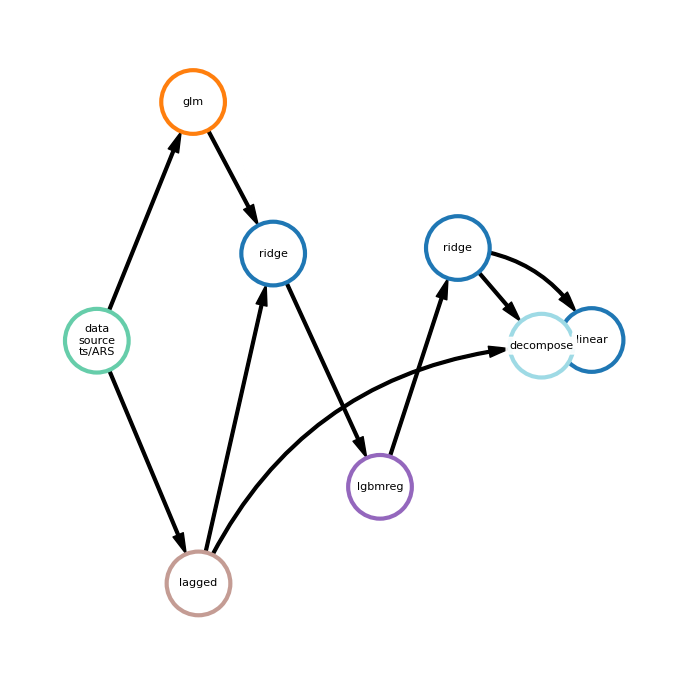

[0.24465469 0.24463596 0.24424768 0.24417289 0.24407627 0.24397737
 0.2434778  0.24342076 0.2436395  0.24415938 0.24381811 0.24424029]
{'mae': 0.004, 'mape': 0.017}


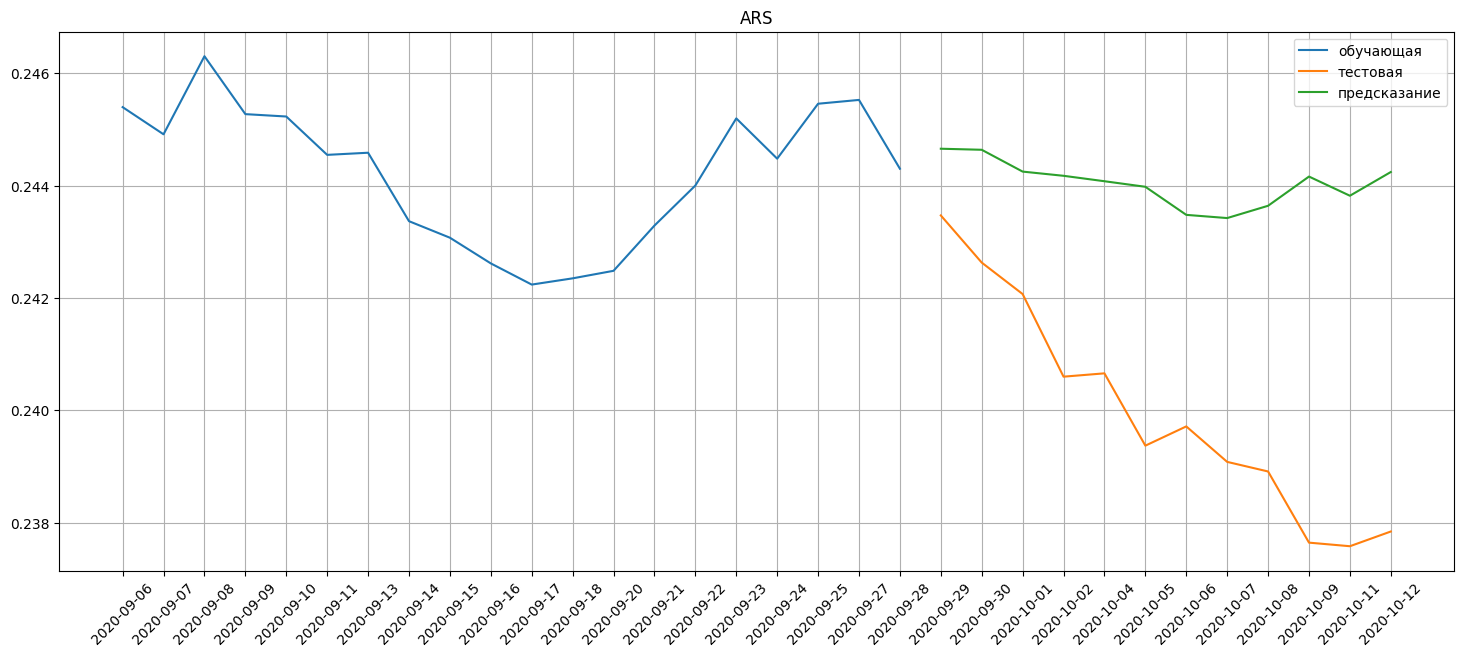


======================================== CNY ========================================
2023-11-07 02:58:16,986 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.1 MiB
2023-11-07 02:58:16,991 - ApiComposer - Initial pipeline was fitted in 7.8 sec.
2023-11-07 02:58:16,994 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 02:58:17,018 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 21 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagge

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 03:10:59,819 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:42<?, ?gen/s]

2023-11-07 03:10:59,852 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-07 03:12:06,552 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [linear, lasso, ridge, ridge, glm, data_source_ts/CNY, ridge, lagged, linear, decompose, linear, decompose]}
linear - {}
lasso - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CNY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.007
 70%|███████   | 7/10 [08:24<03:36, 72.07s/trial, best loss: 0.006539988200157957]
2023-11-07 03:20:31,068 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-07 03:21:36,892 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [linear, lasso, ridge, ridge, glm, data_source_ts/CNY, ridge, lagged, linear, decompose, linear, decompose]}
linear - {}
lasso - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CNY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
d

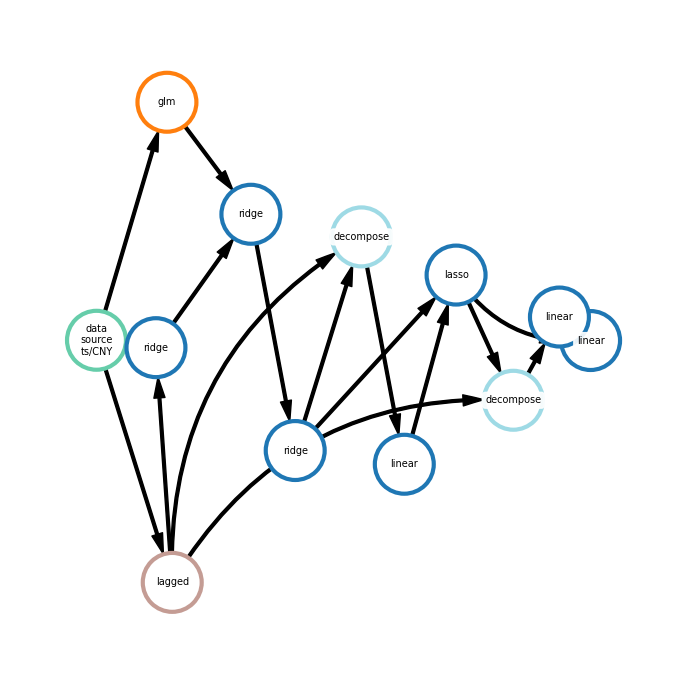

[2.83127468 2.83117501 2.8310783  2.83103332]
{'mae': 0.005, 'mape': 0.002}


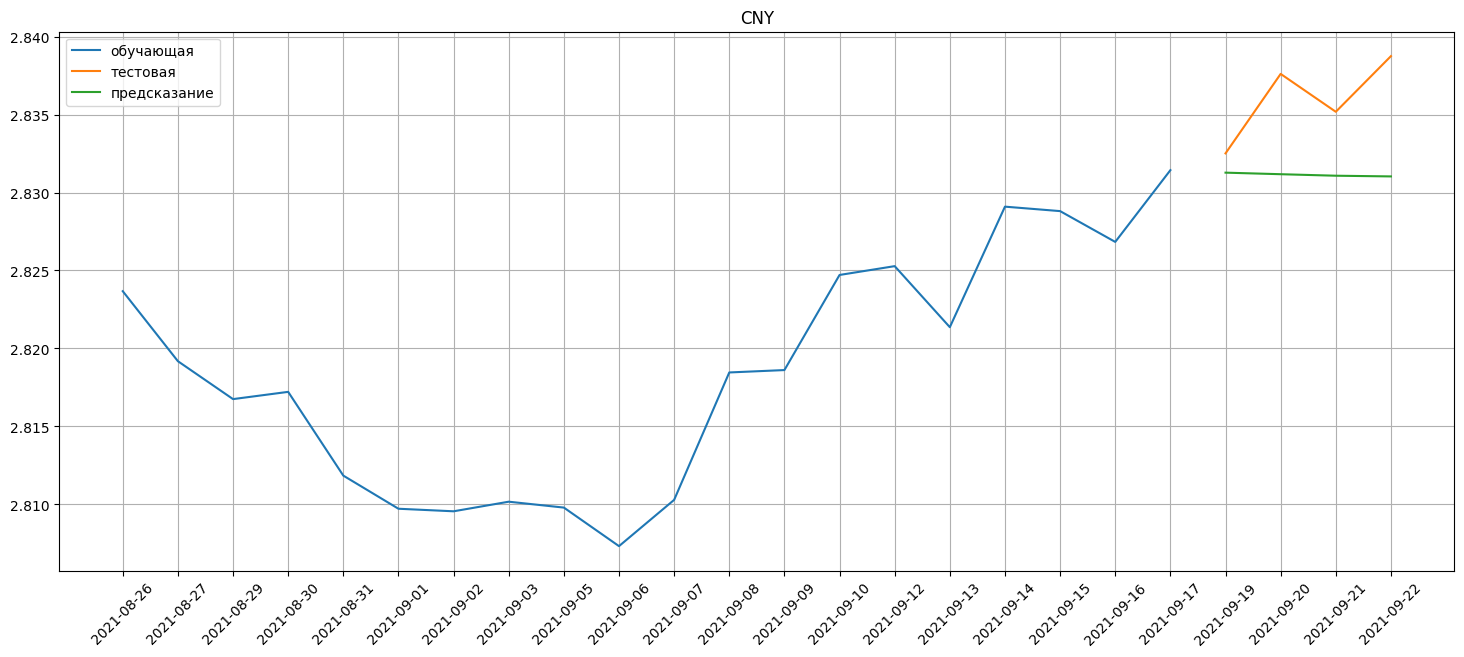


======================================== COP ========================================
2023-11-07 03:22:45,684 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.4 MiB
2023-11-07 03:22:45,688 - ApiComposer - Initial pipeline was fitted in 7.9 sec.
2023-11-07 03:22:45,691 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 03:22:45,717 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 13 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-07

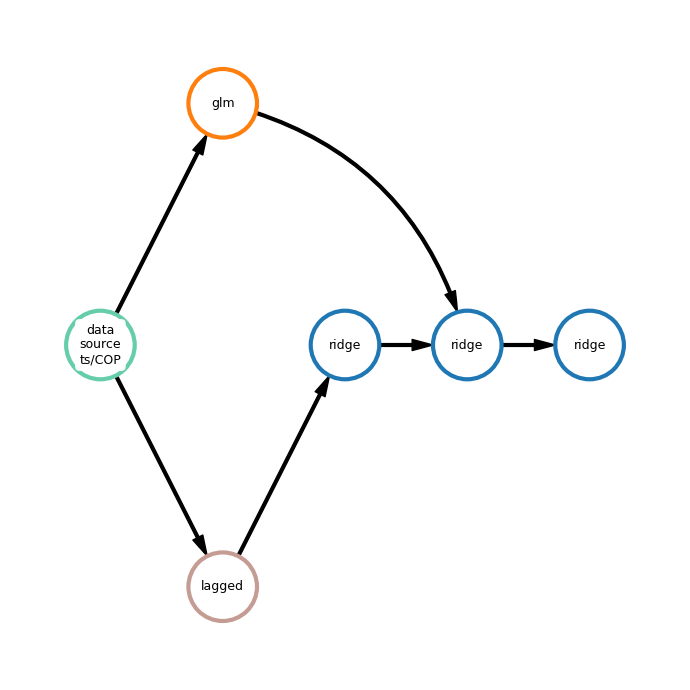

[0.00533527 0.00533491 0.00533457 0.00533424 0.00533392 0.00533359
 0.00533326 0.00533292 0.00533259 0.00533228 0.005332   0.00533171
 0.00533141 0.00533111 0.00533079 0.00533049 0.00533019 0.0053299
 0.00532966 0.00532942]
{'mae': 0.0, 'mape': 0.101}


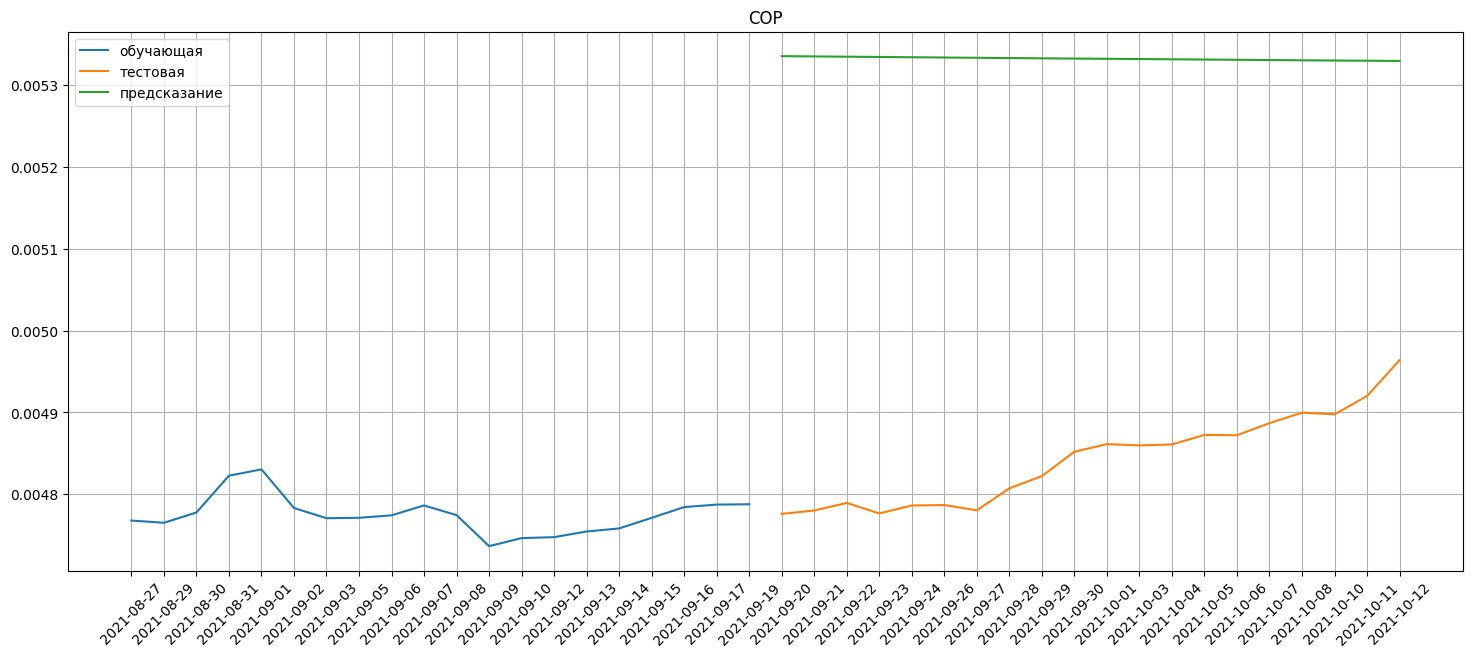


======================================== CAD ========================================
2023-11-07 03:36:19,944 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.6 MiB
2023-11-07 03:36:19,947 - ApiComposer - Initial pipeline was fitted in 13.3 sec.
2023-11-07 03:36:19,950 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 03:36:19,968 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 22 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-0

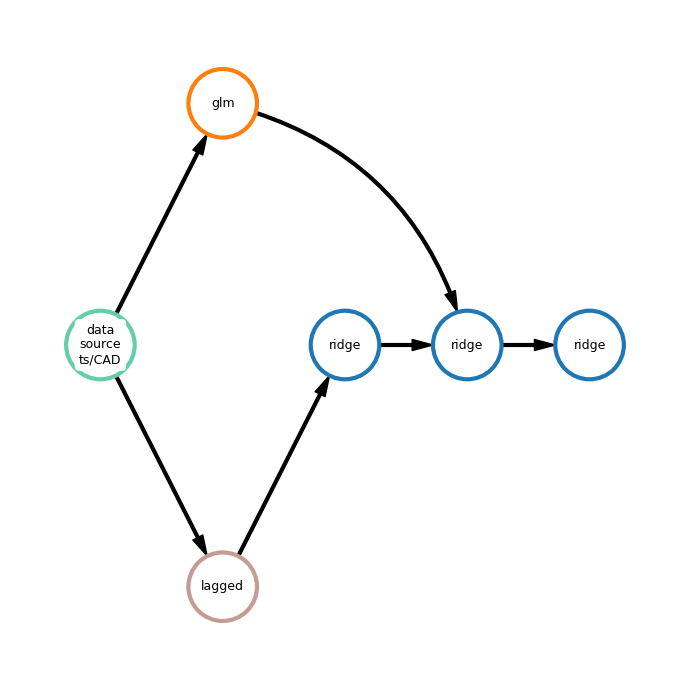

[15.40457998 15.40657916 15.40966298 15.41267807 15.41479527]
{'mae': 0.05, 'mape': 0.003}


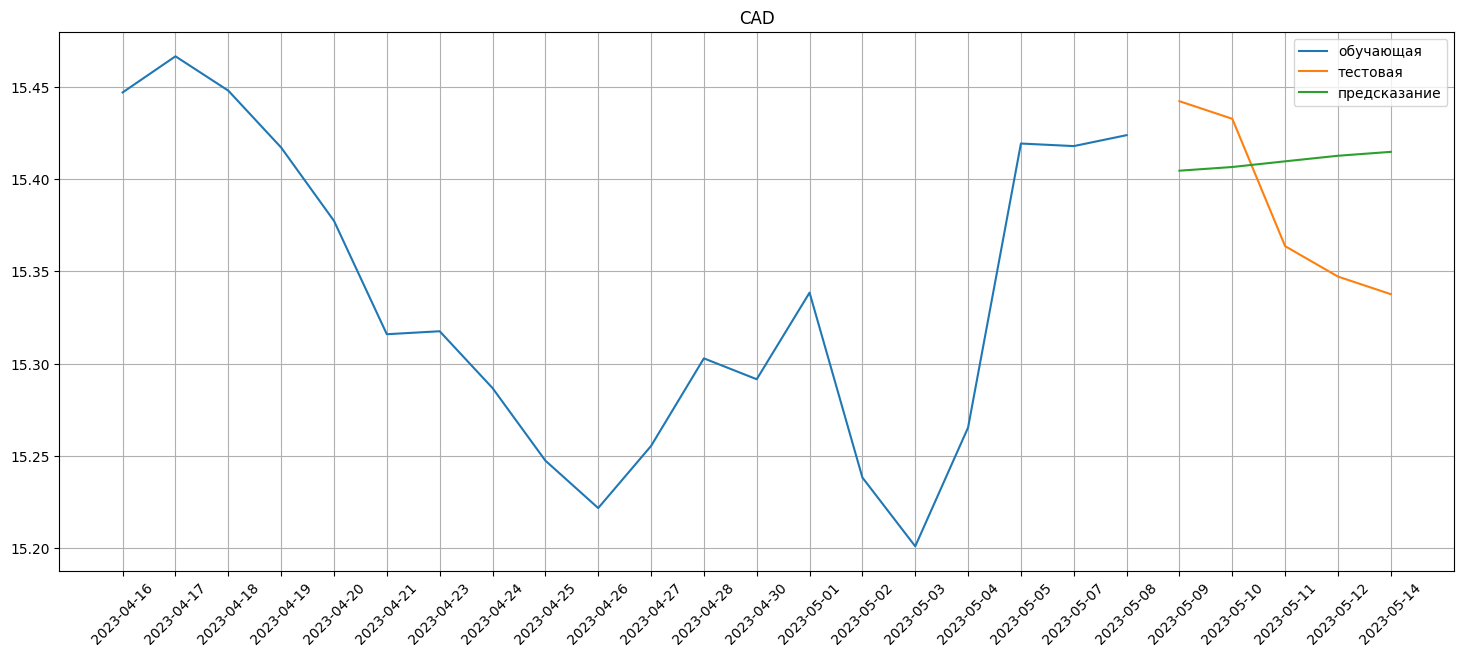


======================================== AED ========================================
2023-11-07 03:59:06,865 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.9 MiB
2023-11-07 03:59:06,869 - ApiComposer - Initial pipeline was fitted in 10.4 sec.
2023-11-07 03:59:06,873 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 03:59:06,900 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 36 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagg

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 04:17:56,617 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [18:49<?, ?gen/s]

2023-11-07 04:17:56,642 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-07 04:18:25,687 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/AED, ridge, lagged, linear, decompose]}
ridge - {}
ridge - {}
ridge - {'alpha': 1.8571445618302318}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/AED - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.038
  0%|          | 32/100000 [11:44<889:27:50, 32.03s/trial, best loss: 0.03796048438462201]
2023-11-07 04:35:35,774 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/AED, ridge, lagged, linear, decompose]}
ridge - {}
ridge - {}
ridge - {'alpha': 1.8571445618302318}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/AED - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-07 04:35:35,777 - PipelineTuner - Final metric: 0.038
2023-11-07 04:35:35,781 - ApiComposer - Hyperparameters tuning finished


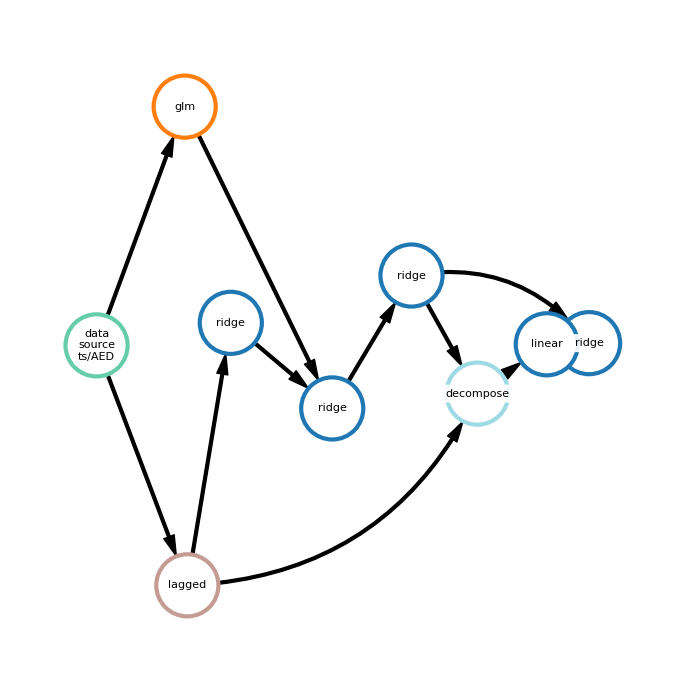

[5.51992961 5.52017848 5.52037826 5.52065352 5.52085659 5.52104912
 5.52127333 5.52149765 5.52164626 5.52190809 5.52215435 5.52236008
 5.52260473 5.52283584]
{'mae': 0.032, 'mape': 0.006}


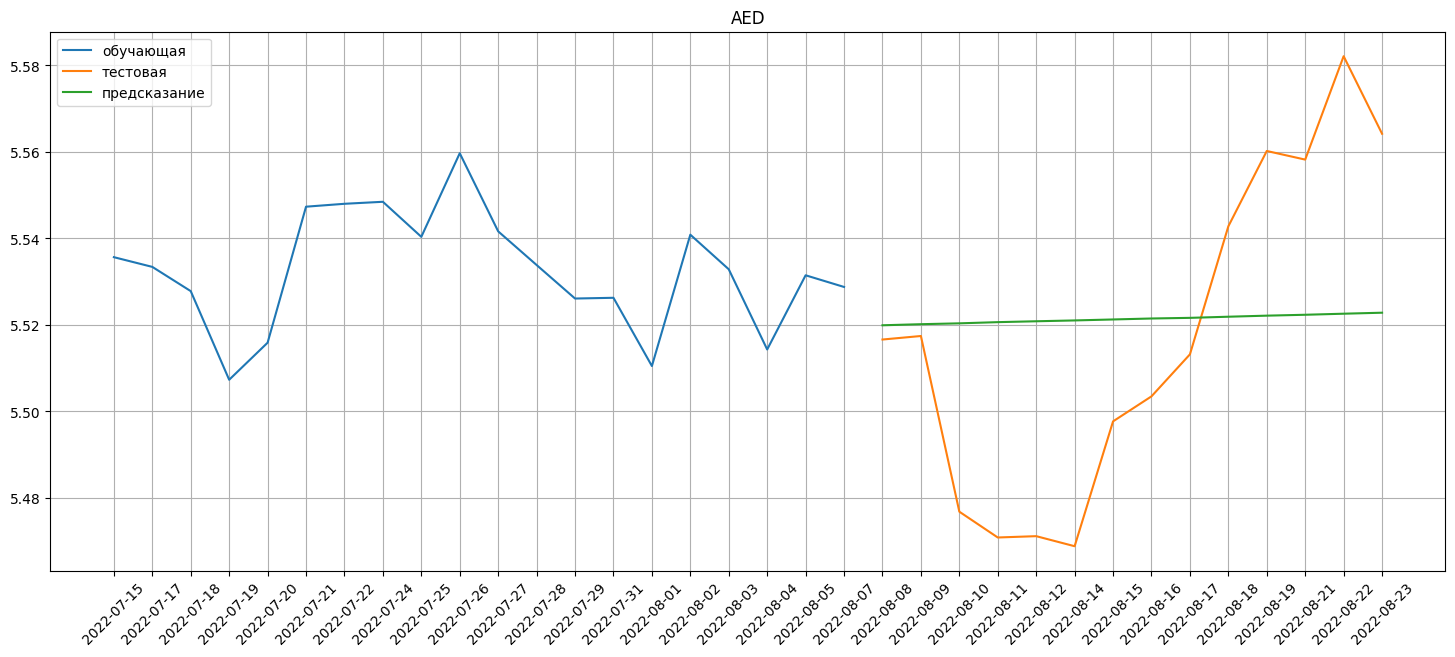


======================================== CAD ========================================
2023-11-07 04:36:23,501 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.3 MiB
2023-11-07 04:36:23,513 - ApiComposer - Initial pipeline was fitted in 10.6 sec.
2023-11-07 04:36:23,516 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 04:36:23,540 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 28 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagg

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 04:51:46,442 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [15:22<?, ?gen/s]

2023-11-07 04:51:46,463 - ApiComposer - Hyperparameters tuning started with 12 min. timeout


2023-11-07 04:51:53,399 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [locf, data_source_ts/CAD]}
locf - {'part_for_repeat': -1}
data_source_ts/CAD - {} 
Initial metric: 0.095
  0%|          | 99/100000 [12:14<208:01:05,  7.50s/trial, best loss: 0.09515648085669232]
2023-11-07 05:04:22,634 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [locf, data_source_ts/CAD]}
locf - {'part_for_repeat': -1}
data_source_ts/CAD - {}
2023-11-07 05:04:22,637 - PipelineTuner - Final metric: 0.095
2023-11-07 05:04:22,641 - ApiComposer - Hyperparameters tuning finished
2023-11-07 05:04:23,029 - ApiComposer - Model generation finished
2023-11-07 05:04:31,802 - FEDOT logger - Final pipeline was fitted
2023-11-07 05:04:31,806 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [locf, data_source_ts/CAD]}
locf - {'part_for_repeat': -1}
data_source_ts/CAD - {}
Memory consumption for finish in main session: current 0.9 MiB, max: 124.7 MiB


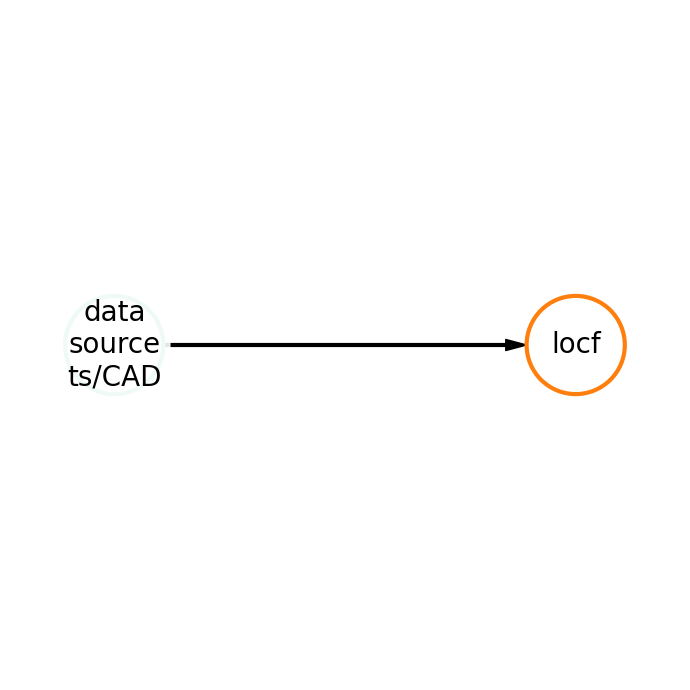

[15.71294693 15.71294693 15.71294693 15.71294693 15.71294693 15.71294693
 15.71294693 15.71294693 15.71294693 15.71294693]
{'mae': 0.115, 'mape': 0.007}


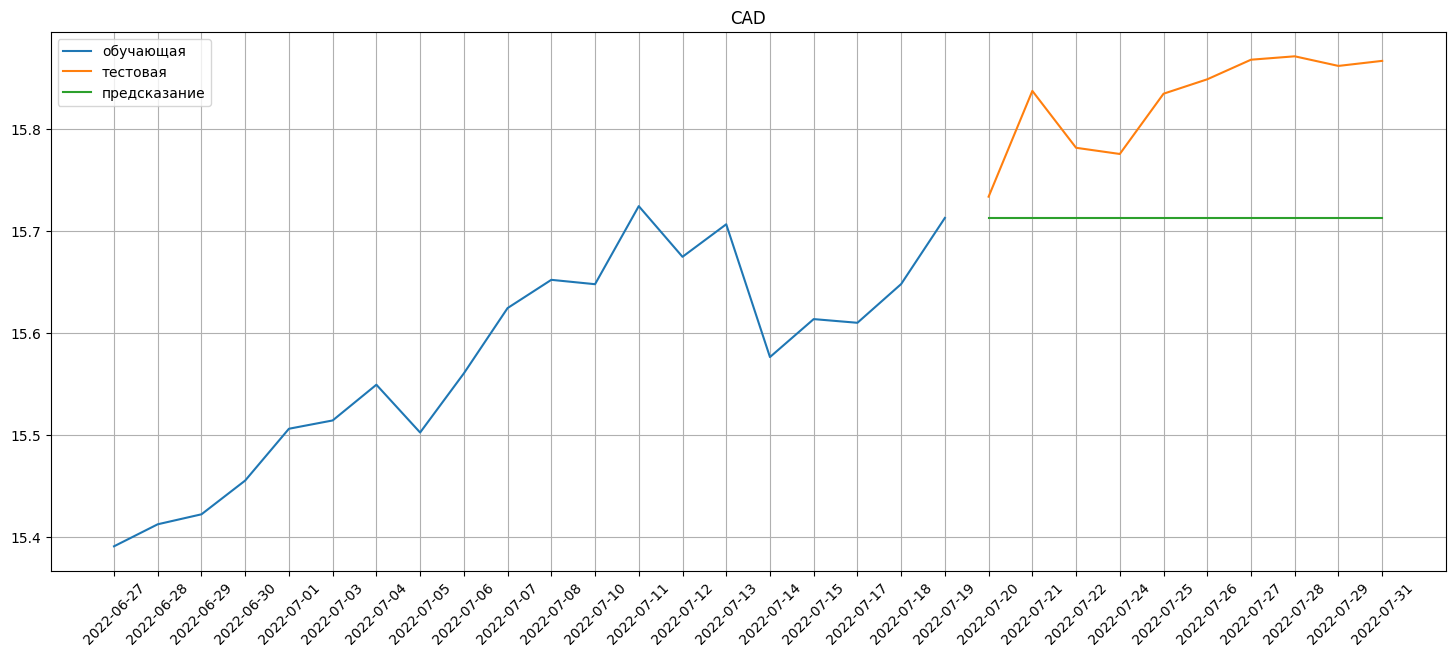


======================================== EGP ========================================
2023-11-07 05:04:45,515 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.7 MiB
2023-11-07 05:04:45,520 - ApiComposer - Initial pipeline was fitted in 7.9 sec.
2023-11-07 05:04:45,523 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 05:04:45,550 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-07 

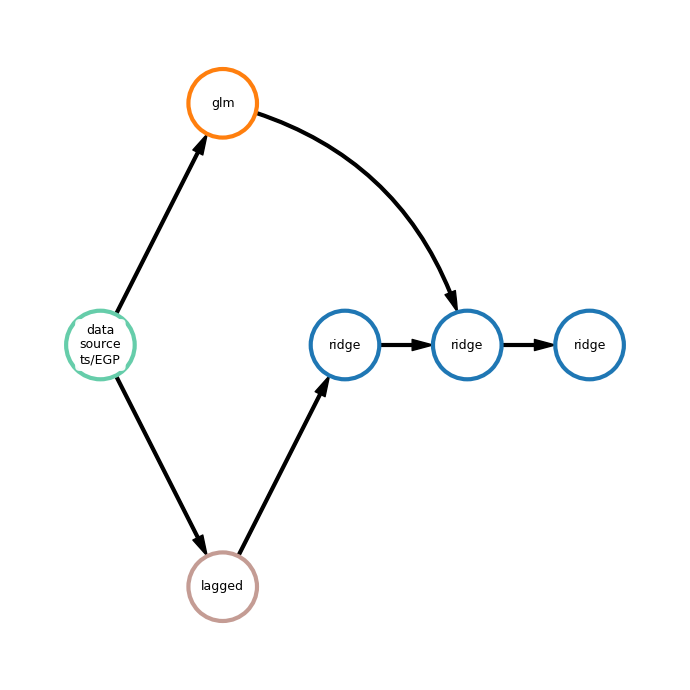

[1.13688019 1.13672206 1.13657023 1.13643177 1.13629594 1.1361477
 1.13599737 1.13583995 1.13567374 1.13550093 1.13532971 1.13516325
 1.13500684 1.13485341 1.13470934 1.13457569]
{'mae': 0.002, 'mape': 0.002}


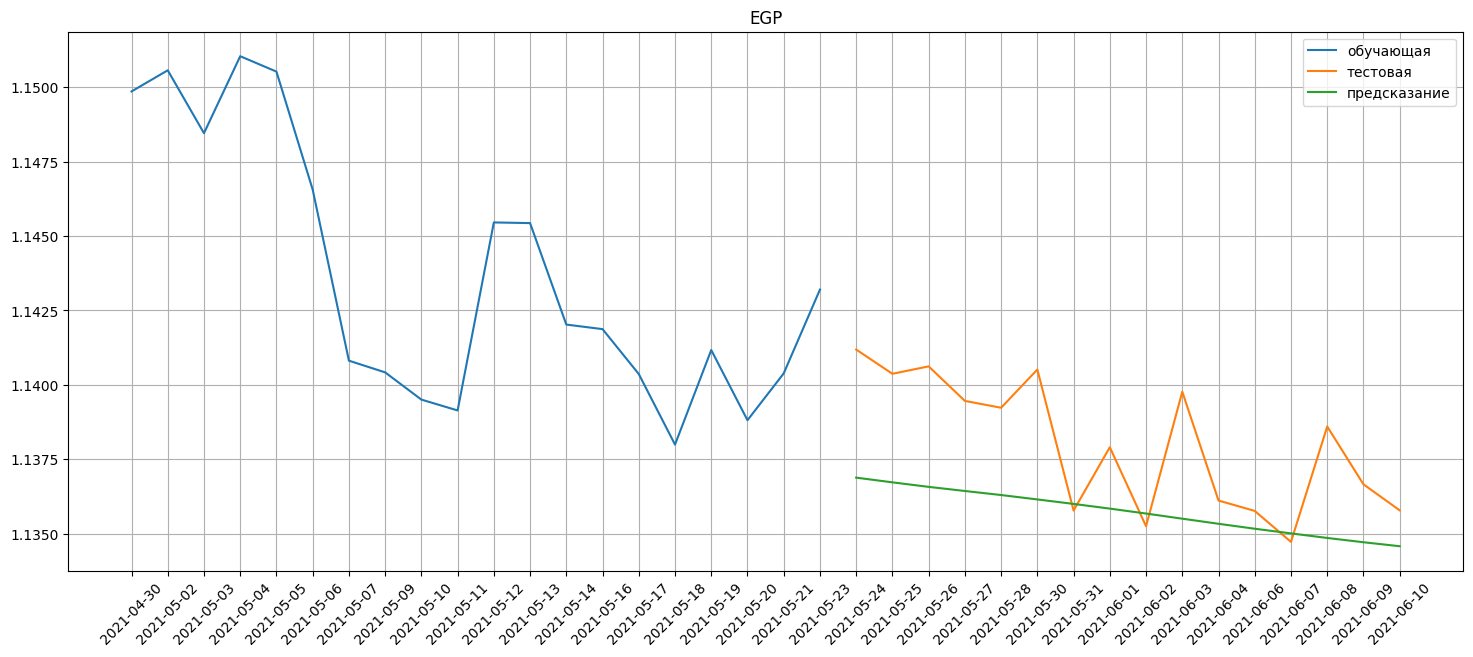


======================================== RUB ========================================
2023-11-07 05:08:08,911 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.9 MiB
2023-11-07 05:08:08,914 - ApiComposer - Initial pipeline was fitted in 14.7 sec.
2023-11-07 05:08:08,916 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 05:08:08,933 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 54 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagg

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 05:26:42,989 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [18:34<?, ?gen/s]

2023-11-07 05:26:43,012 - ApiComposer - Hyperparameters tuning started with 35 min. timeout


2023-11-07 05:27:21,841 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/RUB, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.004
  0%|          | 45/100000 [27:51<1326:12:39, 47.77s/trial, best loss: 0.0027402171715746357]
2023-11-07 06:03:02,999 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/RUB, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8060082380545787, 'subsample': 0.8899173909492387, 'subsample_freq': 10, 'learning_rate': 0.06688372857881794, 'n_estimators': 100, 'reg_alpha': 1.5765389693469753e-05, 'reg_la

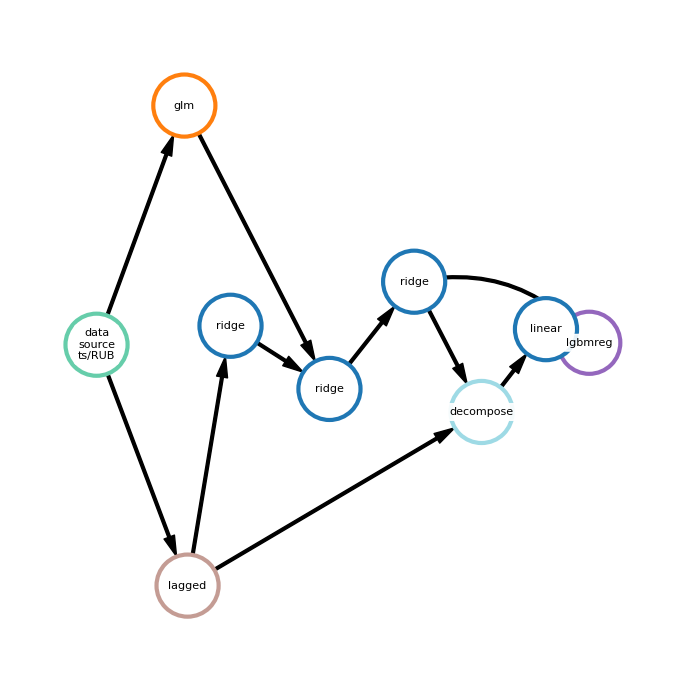

[0.22625479 0.22576749 0.22704339 0.22722679 0.22835419 0.22795065]
{'mae': 0.006, 'mape': 0.025}


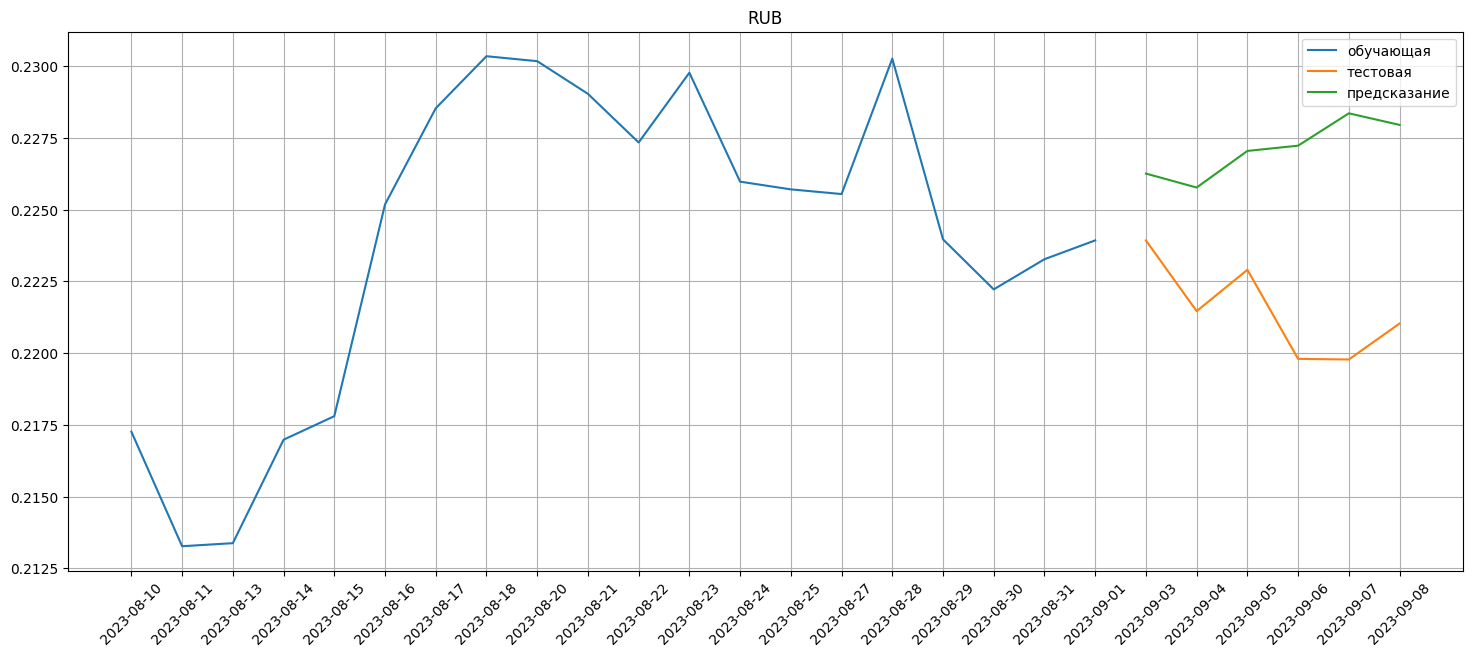


======================================== RON ========================================
2023-11-07 06:04:04,041 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.4 MiB
2023-11-07 06:04:04,045 - ApiComposer - Initial pipeline was fitted in 8.3 sec.
2023-11-07 06:04:04,050 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 06:04:04,076 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 34 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagge

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 06:23:42,306 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [19:38<?, ?gen/s]

2023-11-07 06:23:42,329 - ApiComposer - Hyperparameters tuning started with 14 min. timeout


2023-11-07 06:23:47,844 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/RON]}
ridge - {'alpha': 8.022587784061383}
lagged - {'window_size': 8.611616319005675}
data_source_ts/RON - {} 
Initial metric: 0.017
  0%|          | 124/100000 [14:01<189:52:48,  6.84s/trial, best loss: 0.017173696069063982]
2023-11-07 06:38:01,610 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/RON]}
ridge - {'alpha': 9.882188162149264}
lagged - {'window_size': 12}
data_source_ts/RON - {}
2023-11-07 06:38:01,616 - PipelineTuner - Final metric: 0.017
2023-11-07 06:38:01,624 - ApiComposer - Hyperparameters tuning finished
2023-11-07 06:38:02,010 - ApiComposer - Model generation finished
2023-11-07 06:38:08,823 - FEDOT logger - Final pipeline was fitted
2023-11-07 06:38:08,827 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/RON]}
ridge - {'alpha': 9.88218816214

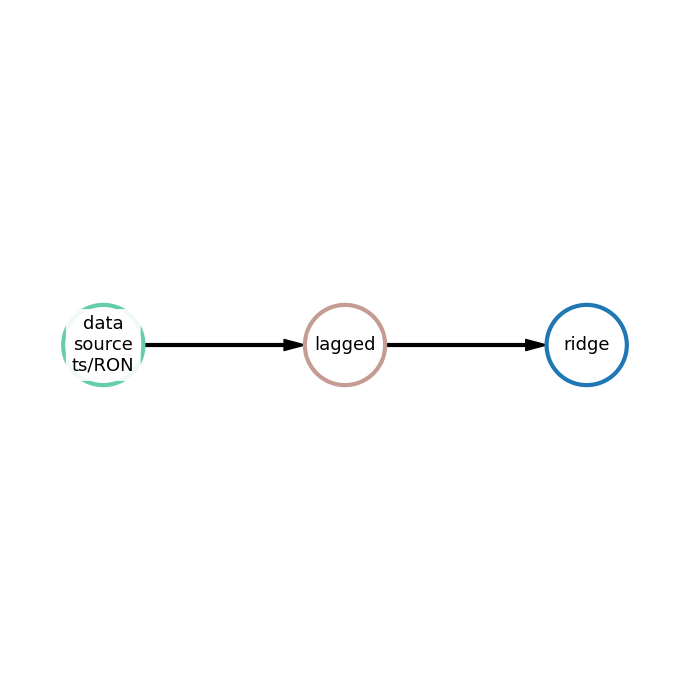

[4.35298835 4.35267922 4.35236282 4.35200363 4.35161217 4.35126164
 4.3509659  4.35074328 4.35053128 4.35029713 4.35001083 4.34967087
 4.34937971 4.34925484 4.34922611 4.34912372 4.34890513 4.34875945
 4.3485628  4.34831894]
{'mae': 0.017, 'mape': 0.004}


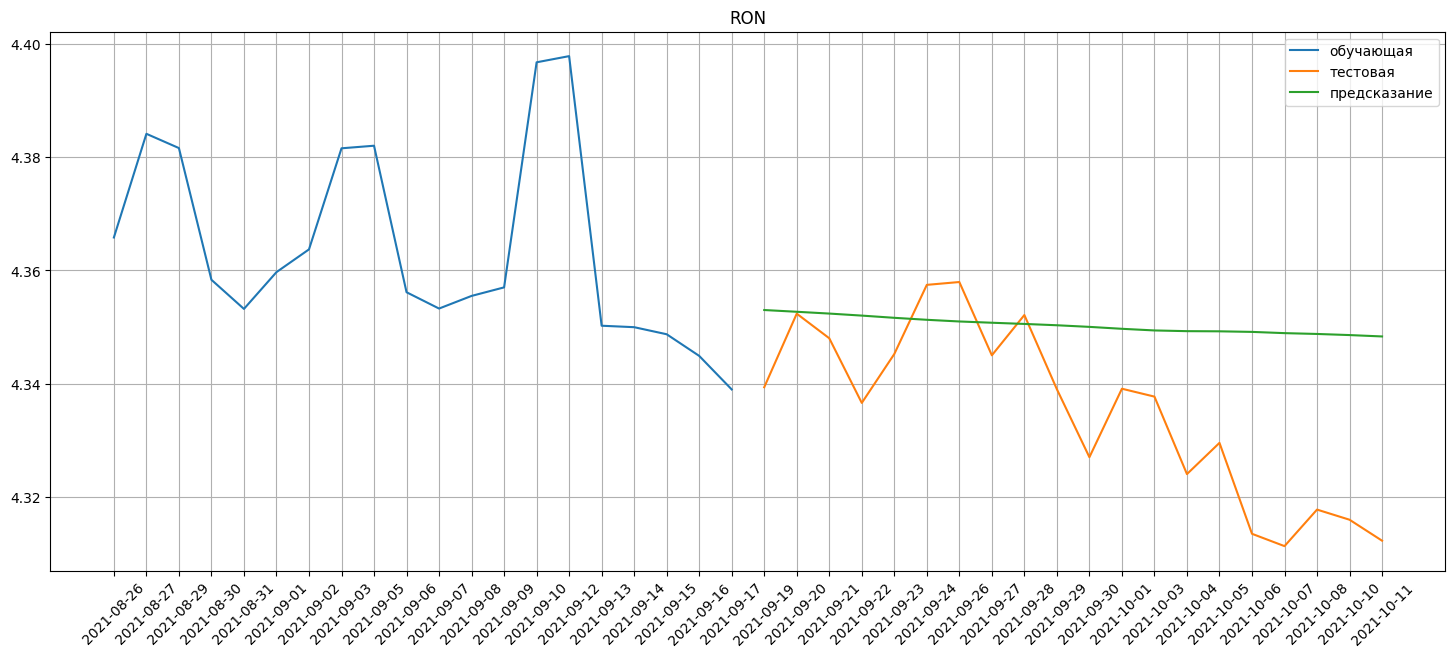


======================================== INR ========================================
2023-11-07 06:38:28,201 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.9 MiB
2023-11-07 06:38:28,205 - ApiComposer - Initial pipeline was fitted in 11.8 sec.
2023-11-07 06:38:28,209 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 06:38:28,234 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-07

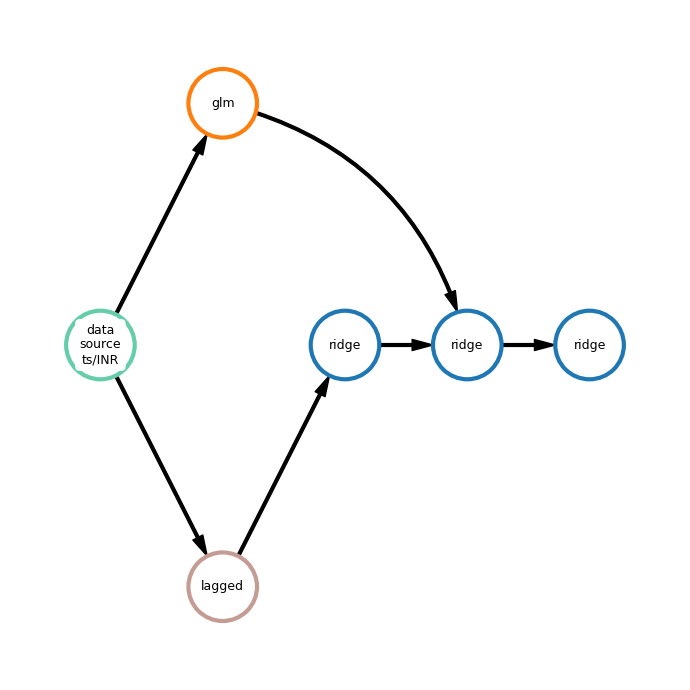

[0.25104457 0.25103727 0.25103047 0.25102403 0.25101966 0.25101477
 0.25100976 0.25100512 0.25100156 0.25099936 0.25099645 0.25099197
 0.2509873  0.2509816  0.2509751  0.25096744 0.25096065 0.25095394
 0.2509473 ]
{'mae': 0.002, 'mape': 0.008}


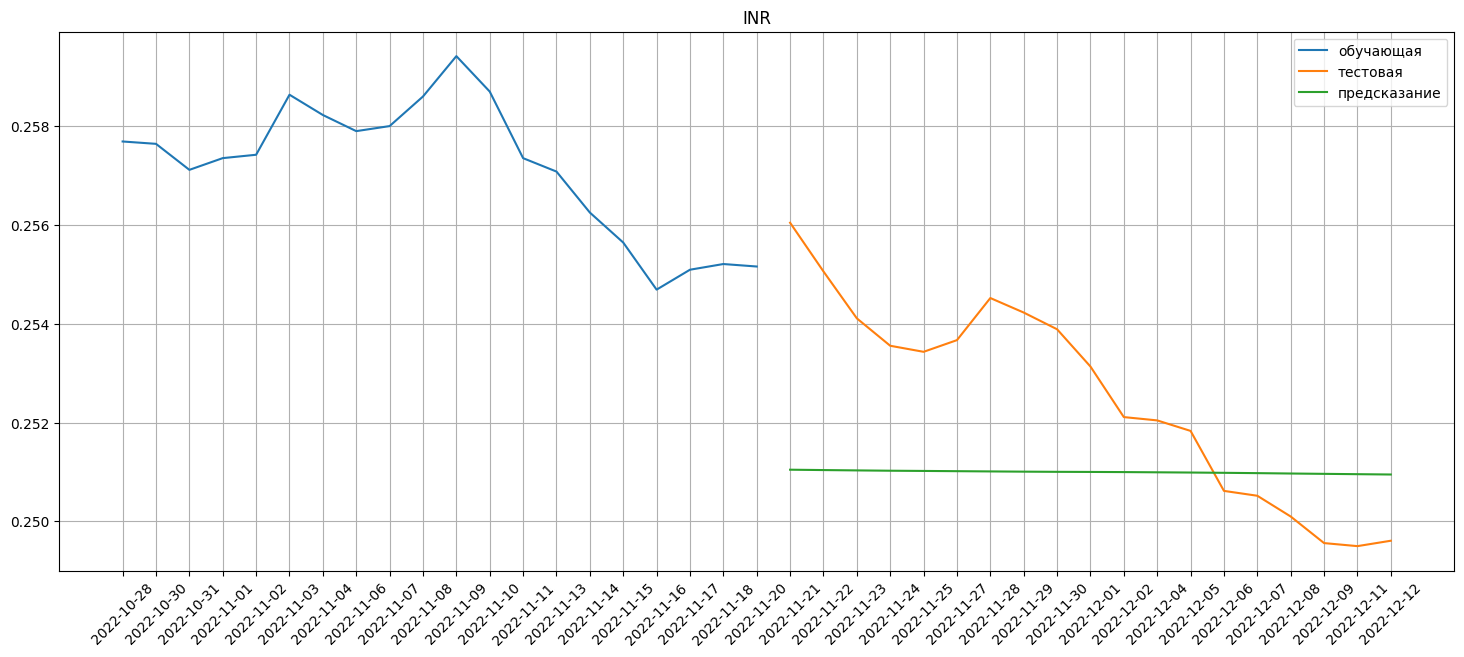


======================================== CZK ========================================
2023-11-07 06:44:06,209 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.6 MiB
2023-11-07 06:44:06,214 - ApiComposer - Initial pipeline was fitted in 14.8 sec.
2023-11-07 06:44:06,218 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 06:44:06,245 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-07

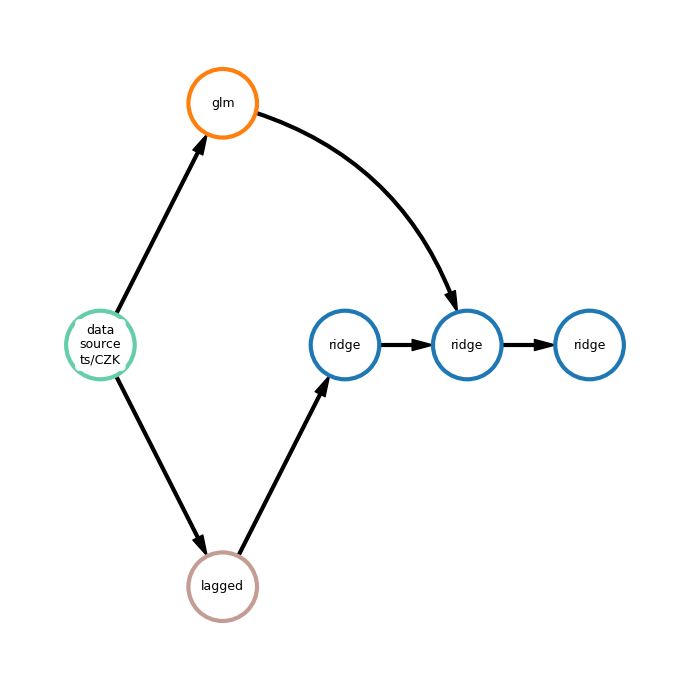

[0.95445792 0.95457841 0.95468455 0.9547934  0.9549122  0.95502973
 0.95514722 0.95525908 0.95536853 0.95547985]
{'mae': 0.011, 'mape': 0.012}


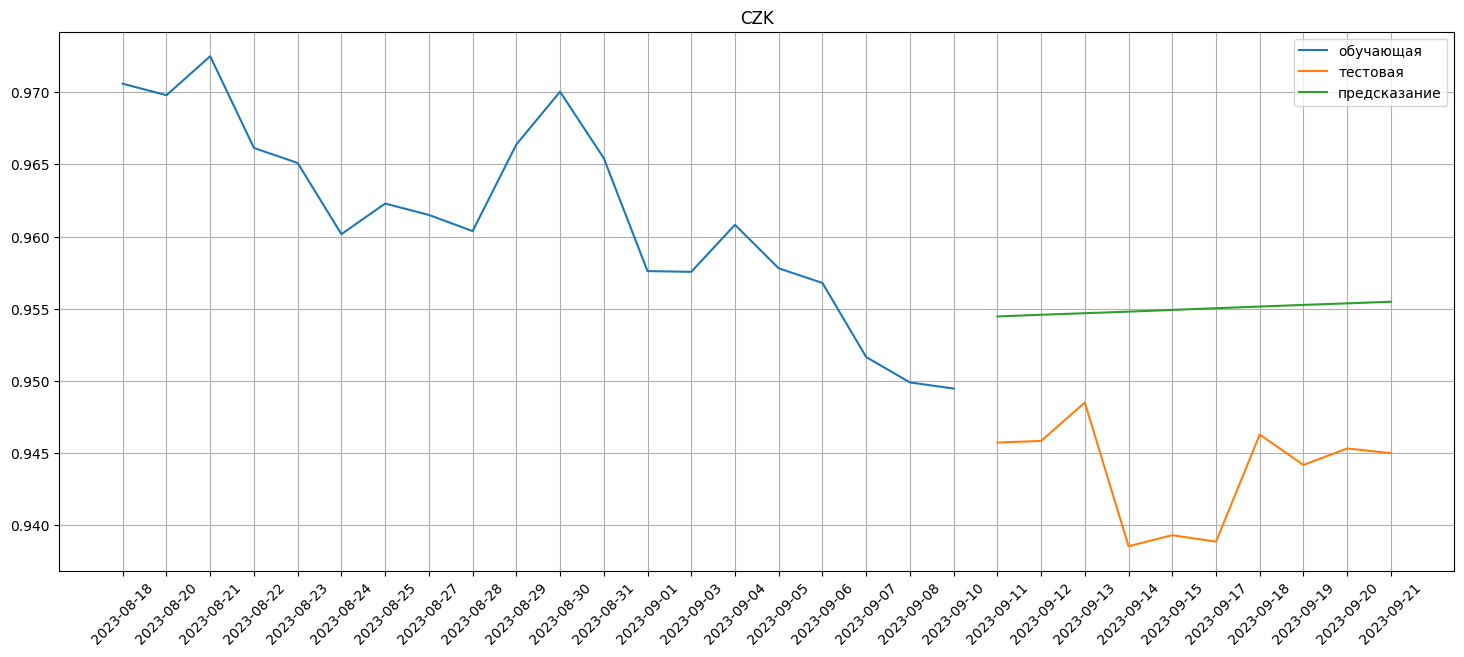


======================================== CZK ========================================
2023-11-07 06:45:41,952 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.3 MiB
2023-11-07 06:45:41,956 - ApiComposer - Initial pipeline was fitted in 9.1 sec.
2023-11-07 06:45:41,960 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 06:45:41,986 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 56 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagge

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 07:04:30,938 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [18:48<?, ?gen/s]

2023-11-07 07:04:30,962 - ApiComposer - Hyperparameters tuning started with 37 min. timeout


2023-11-07 07:04:55,075 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [dtreg, ridge, ridge, glm, data_source_ts/CZK, ridge, lagged, linear, decompose]}
dtreg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.004
  0%|          | 69/100000 [32:36<920:18:19, 33.15s/trial, best loss: 0.005320969147581607]
2023-11-07 07:42:26,863 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [dtreg, ridge, ridge, glm, data_source_ts/CZK, ridge, lagged, linear, decompose]}
dtreg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-07 07:42:26,866 - PipelineTuner - Final metric: 0.004
2023-11-07 07:42:26,872 - ApiComposer - Hyperparameters tuning finished
2023-11-07 07:42:27,255 - ApiComposer - Model generat

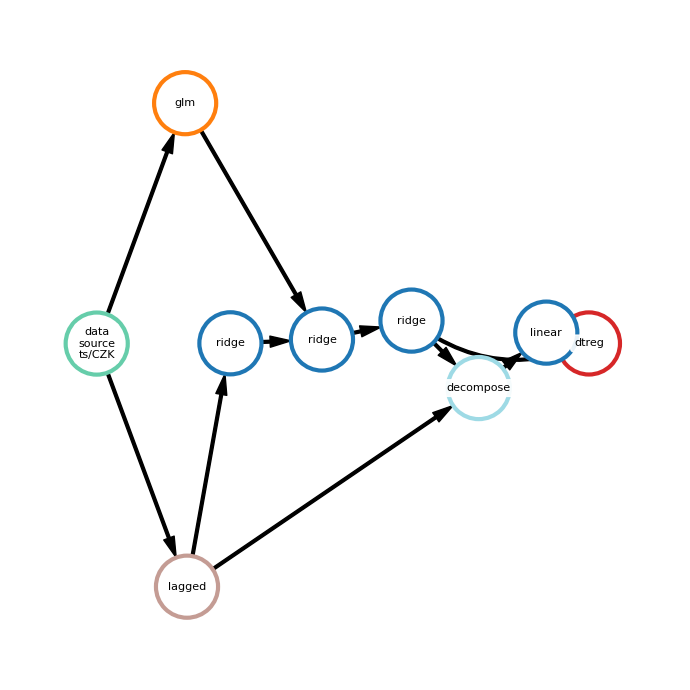

[0.84157667 0.84032293 0.84094997 0.84508987 0.84696914 0.84882066
 0.84566002 0.8451528  0.84480699 0.84643833 0.8432106 ]
{'mae': 0.013, 'mape': 0.016}


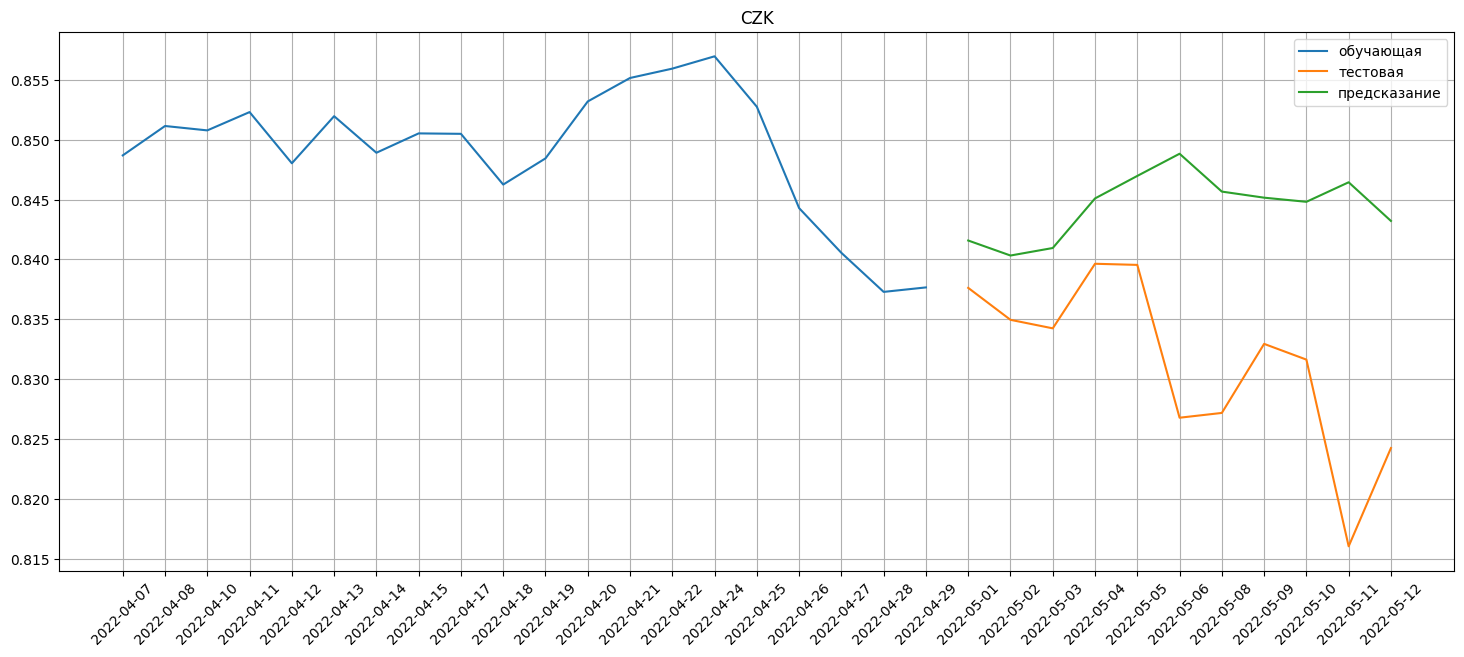


======================================== CNY ========================================
2023-11-07 07:43:11,654 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.4 MiB
2023-11-07 07:43:11,659 - ApiComposer - Initial pipeline was fitted in 11.9 sec.
2023-11-07 07:43:11,662 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-07 07:43:11,680 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 16 min. Set of candidate models: ['gaussian_filter', 'locf', 'ar', 'smoothing', 'polyfit', 'diff_filter', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'glm', 'ets', 'gaussian_filter', 'smoothing', 'normalization', 'ransac_lin_reg', 'lagged', 'sparse_lagged', 'pca', 'cut', 'glm', 'linear', 'ets', 'ridge', 'locf', 'ar', 'lasso', 'polyfit', 'diff_filter', 'scaling', 'ransac_non_lin_reg', 'ts_naive_average', 'sgdr', 'adareg', 'rfr', 'dtreg'].
2023-11-0

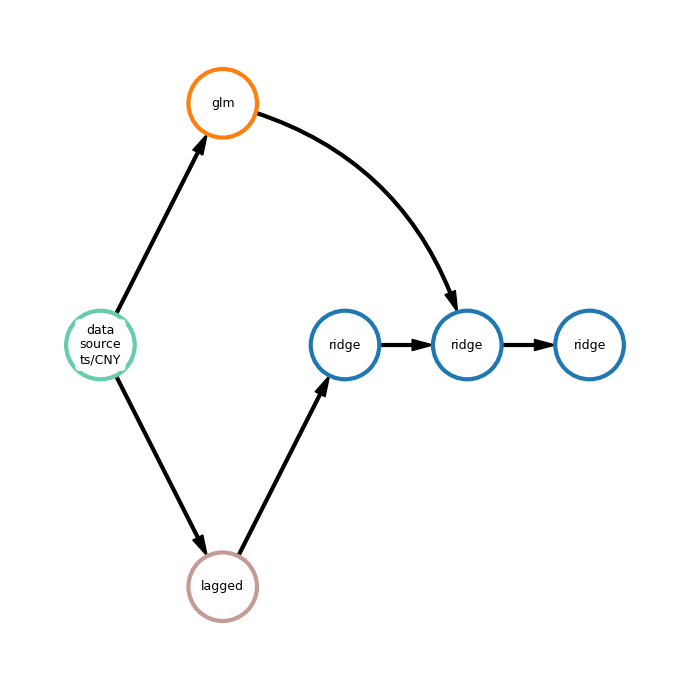

[2.9511513  2.95147338 2.95178801 2.95209923 2.95240236]
{'mae': 0.01, 'mape': 0.003}


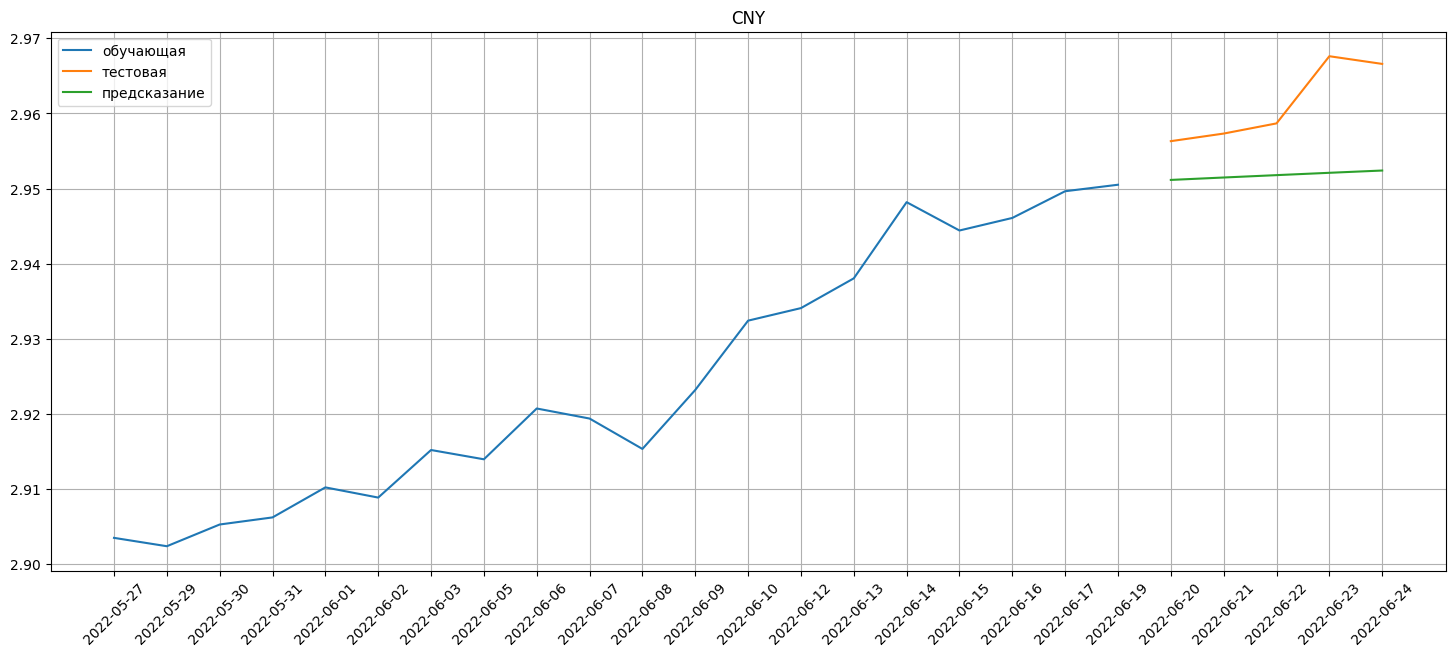


======================================== PLN ========================================
2023-11-07 07:59:43,511 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.1 MiB
2023-11-07 07:59:43,514 - ApiComposer - Initial pipeline was fitted in 9.5 sec.
2023-11-07 07:59:43,517 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-07 07:59:43,535 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 35 min. Set of candidate models: ['arima', 'gaussian_filter', 'ar', 'polyfit', 'smoothing', 'diff_filter', 'locf', 'clstm', 'lagged', 'ts_naive_average', 'sparse_lagged', 'cut', 'stl_arima', 'glm', 'ets', 'gaussian_filter', 'ransac_lin_reg', 'pca', 'cut', 'treg', 'arima', 'ar', 'lasso', 'polyfit', 'poly_features', 'isolation_forest_reg', 'diff_filter', 'exog_ts', 'ransac_non_lin_reg', 'sgdr', 'fast_ica', 'dtreg', 'svr', 'normalization', 'smoothing', 'lagge

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-07 08:18:55,975 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [19:12<?, ?gen/s]

2023-11-07 08:18:55,995 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-11-07 08:19:03,666 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/PLN, dtreg, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PLN - {}
dtreg - {}
lagged - {'window_size': 10} 
Initial metric: 0.037
  0%|          | 88/100000 [14:14<304:09:53, 10.96s/trial, best loss: 0.033061533187696925]
2023-11-07 08:34:50,601 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/PLN, dtreg, lagged]}
ridge - {'alpha': 4.711198529474059}
ridge - {'alpha': 1.5206551672625825}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/PLN - {}
dtreg - {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 9}
lagged - {'window_size': 463}
2023-11-07 08:34:50,605 - PipelineTuner - Final metric: 0.033
2023-11-07 08:34:50,613 - ApiComposer - Hyperparameters tuning finished
2023-11-07 08:34:50,998 - ApiComposer - Model genera

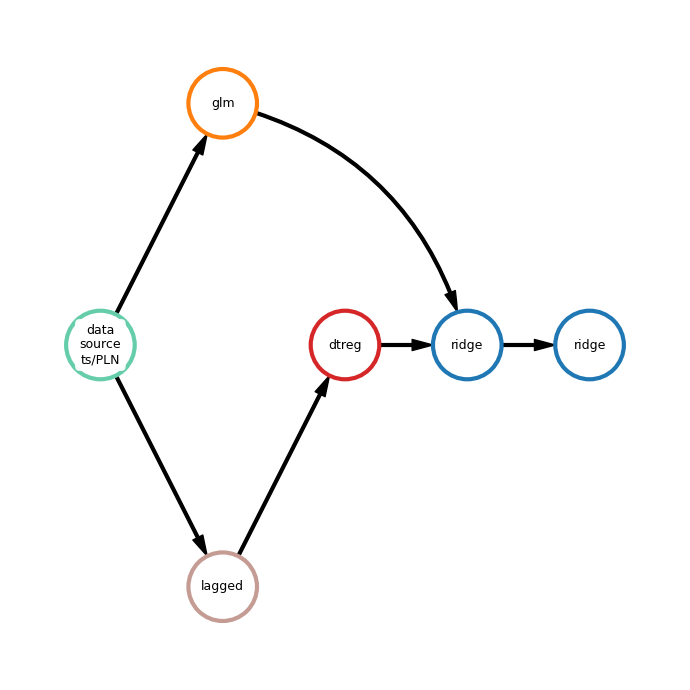

[4.498481   4.49866534 4.49898571]
{'mae': 0.045, 'mape': 0.01}


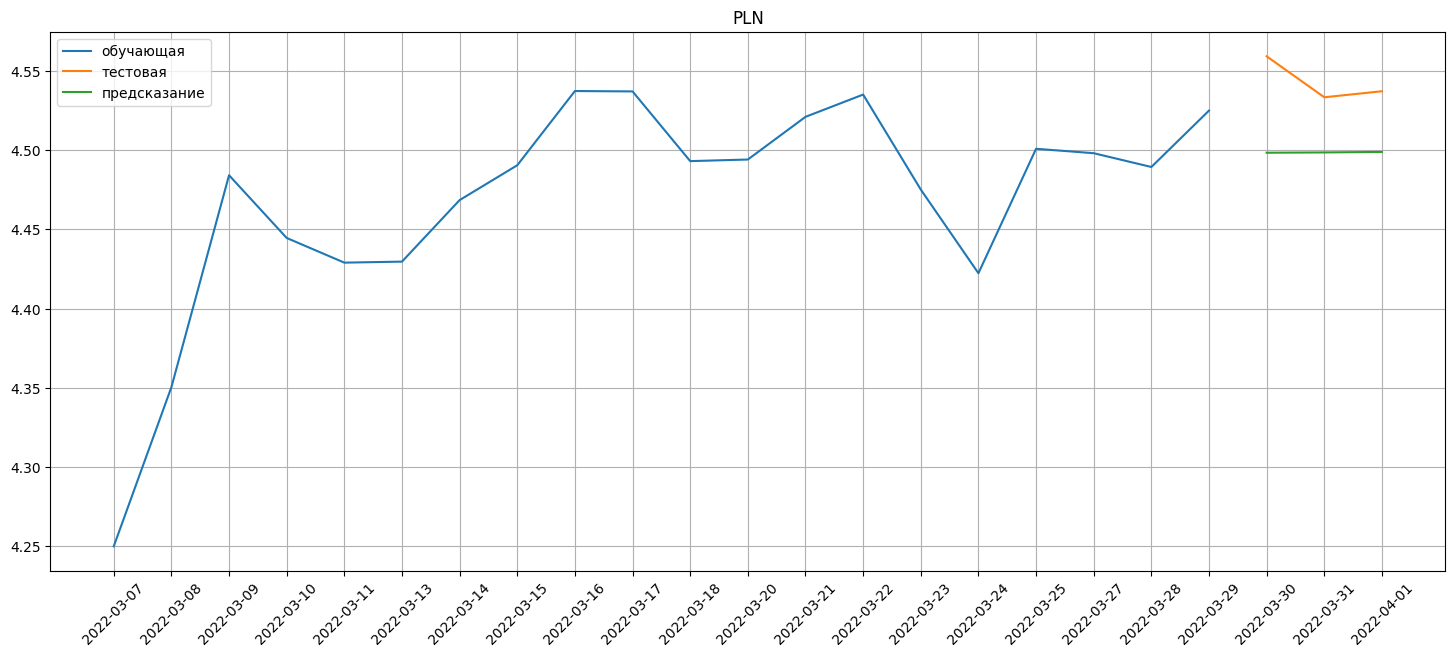

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
5,"(2023, 11, 5, 19, 5, 28, 6, 309, 0)",ARS,7,562,58,0.006
6,"(2023, 11, 5, 20, 6, 41, 6, 309, 0)",HUF,8,905,18,0.009
7,"(2023, 11, 5, 20, 25, 59, 6, 309, 0)",JPY,14,18,3,0.024
8,"(2023, 11, 5, 20, 30, 50, 6, 309, 0)",JPY,3,647,57,0.007
9,"(2023, 11, 5, 21, 31, 0, 6, 309, 0)",PKR,2,751,41,0.001


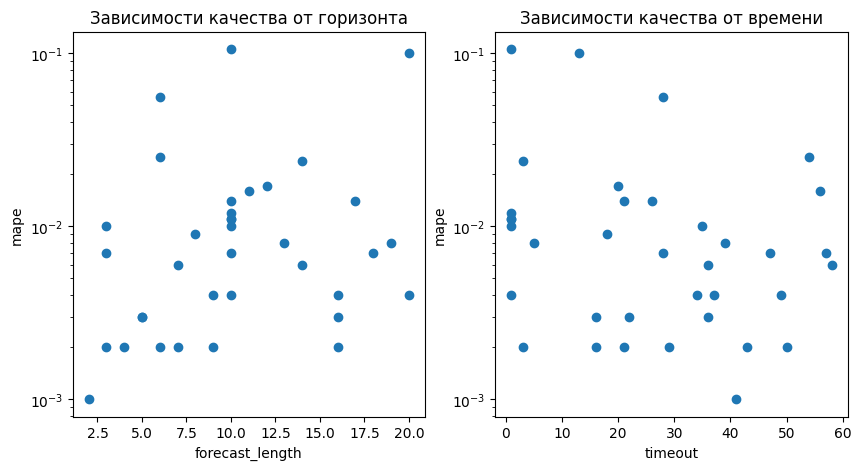

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()